In [1]:
import pandas
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt

In [2]:
RADAR01 = 'C://Users/Rasmu/Documents/Thesis/S1_resampled/VH_20200114_desc_S5.tif' 
RADAR02 = 'C://Users/Rasmu/Documents/Thesis/S1_resampled/VH_20200214_desc_S5.tif'
RADAR03 = 'C://Users/Rasmu/Documents/Thesis/S1_resampled/VH_20200314_desc_S5.tif'
RADAR08 = 'C://Users/Rasmu/Documents/Thesis/S1_resampled/VH_20200814_desc_S5.tif'
RADAR11 = 'C://Users/Rasmu/Documents/Thesis/S1_resampled/VH_20201114_desc_S5.tif'

In [3]:
points = 'C:/Users/Rasmu/Documents/Thesis/In_Situ_Locations/In_Situ_Geilo2.shp'
#points = 'C:/Users/Rasmu/Documents/Thesis/SD_Rescaled/SD_Rescaled2_gt2l.shp'
df_train = gpd.read_file(points)

df_train['lon'] = df_train.geometry.x
df_train['lat'] = df_train.geometry.y
coords = [(x,y) for x, y in zip(df_train.lon, df_train.lat)]

In [4]:
src_01 = rasterio.open(RADAR01)
src_02 = rasterio.open(RADAR02)
src_03 = rasterio.open(RADAR03)
src_08 = rasterio.open(RADAR08)
src_11 = rasterio.open(RADAR11)

# Sample the raster at every point location and store values in DataFrame
df_train['01'] = [x[0] for x in src_01.sample(coords)]
df_train['02'] = [x[0] for x in src_02.sample(coords)]    
df_train['03'] = [x[0] for x in src_03.sample(coords)]
df_train['08'] = [x[0] for x in src_08.sample(coords)]
df_train['11'] = [x[0] for x in src_11.sample(coords)]

In [5]:
df_train

,layer,In_Situ_SD,geometry,lon,lat,01,02,03,08,11
0,Finse,2.02,POINT (91271.950 6740795.801),91271.950329,6.740796e+06,-21.699210,-20.978580,-21.526398,-23.400021,-23.651362
1,Roeldalsfjellet,3.28,POINT (37343.717 6661572.781),37343.717189,6.661573e+06,-26.773292,-22.310550,-19.848571,-20.558947,-16.635201
2,Sandhaug,2.28,POINT (83550.741 6695661.773),83550.741272,6.695662e+06,-20.512914,-20.255600,-21.147783,-23.015453,-23.083120
3,Sandhaug2,2.28,POINT (83376.239 6698596.684),83376.238839,6.698597e+06,-22.371055,-22.103193,-22.145765,-24.576266,-25.445230
4,Sandhaug3,2.28,POINT (83649.407 6691171.481),83649.406839,6.691171e+06,-20.464891,-19.964072,-19.282406,-24.374532,-24.377134
5,Roeldalsfjellet2,3.28,POINT (36428.593 6662001.485),36428.593048,6.662001e+06,-18.802849,-15.762158,-14.388486,-21.806525,-22.443871
6,Roeldalsfjellet3,3.28,POINT (38067.601 6660759.812),38067.601047,6.660760e+06,-24.126830,-21.600494,-22.885230,-19.675464,-17.865929
7,Finse2,2.02,POINT (90993.901 6740183.408),90993.901017,6.740183e+06,-21.645245,-20.569478,-20.973229,-23.912628,-25.136938
8,Finse3,2.02,POINT (91478.153 6741543.040),91478.153380,6.741543e+06,-18.970641,-17.801587,-17.560429,-22.356347,-23.765484


In [6]:
df_train = df_train[['01','02','03','08','11']]

In [7]:
df_train

,01,02,03,08,11
0,-21.699210,-20.978580,-21.526398,-23.400021,-23.651362
1,-26.773292,-22.310550,-19.848571,-20.558947,-16.635201
2,-20.512914,-20.255600,-21.147783,-23.015453,-23.083120
3,-22.371055,-22.103193,-22.145765,-24.576266,-25.445230
4,-20.464891,-19.964072,-19.282406,-24.374532,-24.377134
5,-18.802849,-15.762158,-14.388486,-21.806525,-22.443871
6,-24.126830,-21.600494,-22.885230,-19.675464,-17.865929
7,-21.645245,-20.569478,-20.973229,-23.912628,-25.136938
8,-18.970641,-17.801587,-17.560429,-22.356347,-23.765484


In [8]:
df_train = df_train.T
df_train

,0,1,2,3,4,5,6,7,8
01,-21.699210,-26.773292,-20.512914,-22.371055,-20.464891,-18.802849,-24.126830,-21.645245,-18.970641
02,-20.978580,-22.310550,-20.255600,-22.103193,-19.964072,-15.762158,-21.600494,-20.569478,-17.801587
03,-21.526398,-19.848571,-21.147783,-22.145765,-19.282406,-14.388486,-22.885230,-20.973229,-17.560429
08,-23.400021,-20.558947,-23.015453,-24.576266,-24.374532,-21.806525,-19.675464,-23.912628,-22.356347
11,-23.651362,-16.635201,-23.083120,-25.445230,-24.377134,-22.443871,-17.865929,-25.136938,-23.765484


In [9]:
df_train = df_train.rename(columns={0: "Finse", 1: "Roeldalsfjellet", 2: "Sandhaug", 3: "Sandhaug2", 4: "Sandhaug3",5: "Roeldalsfjellet2", 6: "Roeldalsfjellet3", 7: "Finse2", 8: "Finse3"})

In [10]:
df_train

,Finse,Roeldalsfjellet,Sandhaug,Sandhaug2,Sandhaug3,Roeldalsfjellet2,Roeldalsfjellet3,Finse2,Finse3
01,-21.699210,-26.773292,-20.512914,-22.371055,-20.464891,-18.802849,-24.126830,-21.645245,-18.970641
02,-20.978580,-22.310550,-20.255600,-22.103193,-19.964072,-15.762158,-21.600494,-20.569478,-17.801587
03,-21.526398,-19.848571,-21.147783,-22.145765,-19.282406,-14.388486,-22.885230,-20.973229,-17.560429
08,-23.400021,-20.558947,-23.015453,-24.576266,-24.374532,-21.806525,-19.675464,-23.912628,-22.356347
11,-23.651362,-16.635201,-23.083120,-25.445230,-24.377134,-22.443871,-17.865929,-25.136938,-23.765484


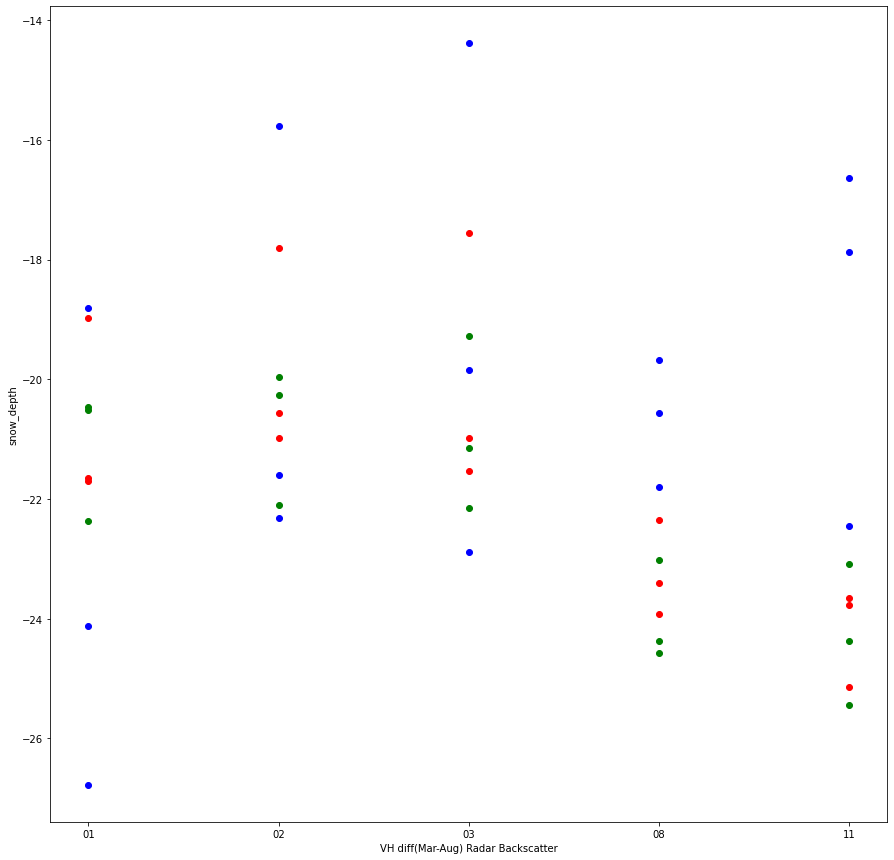

In [11]:
plt.figure(figsize=(15, 15))
plt.xlabel('VH diff(Mar-Aug) Radar Backscatter')
plt.ylabel('snow_depth')
plt.scatter(df_train.index, df_train.Finse, color='red');
plt.scatter(df_train.index, df_train.Finse2, color='red');
plt.scatter(df_train.index, df_train.Finse3, color='red');
plt.scatter(df_train.index, df_train.Roeldalsfjellet, color='blue');
plt.scatter(df_train.index, df_train.Roeldalsfjellet2, color='blue');
plt.scatter(df_train.index, df_train.Roeldalsfjellet3, color='blue');
plt.scatter(df_train.index, df_train.Sandhaug, color='Green');
plt.scatter(df_train.index, df_train.Sandhaug2, color='Green');
plt.scatter(df_train.index, df_train.Sandhaug3, color='Green');